# Lab 2:  Problem 1

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/tma4215.css", "r").read()
    return HTML(styles)

# Comment out next line and execute this cell to restore the default notebook style 
#css_styling()

We start with a quick reminder of what we did in Lecture 8.

$$
\DeclareMathOperator{\Div}{div}
\DeclareMathOperator{\Grad}{grad}
\DeclareMathOperator{\Curl}{curl}
\DeclareMathOperator{\Rot}{rot}
\DeclareMathOperator{\ord}{ord}
\DeclareMathOperator{\Kern}{ker}
\DeclareMathOperator{\Image}{im}
\DeclareMathOperator{\spann}{span}
\DeclareMathOperator{\rank}{rank}
\DeclareMathOperator{\dist}{dist}
\DeclareMathOperator{\diam}{diam}
\DeclareMathOperator{\sig}{sig}
\DeclareMathOperator{\Id}{Id}
\newcommand{\RR}{\mathbb{R}}
\newcommand{\NN}{\mathbb{N}}
\newcommand{\VV}{\mathbb{V}}
\newcommand{\dGamma}{\,\mathrm{d} \Gamma}
\newcommand{\dGammah}{\,\mathrm{d} \Gamma_h}
\newcommand{\dx}{\,\mathrm{d}x}
\newcommand{\dy}{\,\mathrm{d}y}
\newcommand{\ds}{\,\mathrm{d}s}
\newcommand{\dt}{\,\mathrm{d}t}
\newcommand{\dS}{\,\mathrm{d}S}
\newcommand{\dV}{\,\mathrm{d}V}
\newcommand{\dX}{\,\mathrm{d}X}
\newcommand{\dY}{\,\mathrm{d}Y}
\newcommand{\dE}{\,\mathrm{d}E}
\newcommand{\dK}{\,\mathrm{d}K}
\newcommand{\dM}{\,\mathrm{d}M}
\newcommand{\cd}{\mathrm{cd}}
\newcommand{\onehalf}{\frac{1}{2}}
\newcommand{\bfP}{\boldsymbol P}
\newcommand{\bfx}{\boldsymbol x}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bfa}{\boldsymbol a}
\newcommand{\bfu}{\boldsymbol u}
\newcommand{\bfv}{\boldsymbol v}
\newcommand{\bfe}{\boldsymbol e}
\newcommand{\bfb}{\boldsymbol b}
\newcommand{\bfc}{\boldsymbol c}
\newcommand{\bfq}{\boldsymbol q}
\newcommand{\bfy}{\boldsymbol y}
\newcommand{\bff}{\boldsymbol f}
\newcommand{\bfp}{\boldsymbol p}
\newcommand{\bft}{\boldsymbol t}
\newcommand{\bfj}{\boldsymbol j}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfV}{\boldsymbol V}
\newcommand{\bfE}{\boldsymbol E}
\newcommand{\bfB}{\boldsymbol B}
\newcommand{\bfzero}{\boldsymbol 0}
$$
## Reduced QR Factorization

Let $A \in \RR^{m,n}$ and
assume that we have a (full) $QR$ factorization such that

\begin{align}
A = 
Q
\begin{pmatrix}
\widehat{R}
\\
0
\end{pmatrix} \in \RR^{m,n}
\end{align}
where $Q = (\bfq_1 | \cdots | \bfq_m) \in O(m)$ is a orthogonal matrix, and 
$\widehat{R} \in \RR^{n,n}$ is an upper triangular matrix.

Then the __full__ $QR$ factorization can be transformed
into a __reduced__ $QR$ factorizations of the form
\begin{align}
A = 
\widehat{Q}
\widehat{R}
 \in \RR^{m,n}
\end{align}
with $\widehat{Q} = (\bfq_1 | \cdots | \bfq_n) \in  \RR^{m,n}$
satisfying $\widehat{Q}^T \widehat{Q} = \Id_n \in \RR^{n,n}$. Here $\Id_n$ denotes
the $n \times n$ Identity matrix.

Recall from Lecture 7 that we can solve the least squares problem (l.s.p) by using the full QR factorization as follows:

1) Define
\begin{align*}
Q^T \bfb 
= \begin{pmatrix}
\bfb_1
\\
\bfb_2
\end{pmatrix}
\end{align*}
with $\bfb_1 \in \RR^n$ and $\bfb_2 \in \RR^{m-n}$.

2) Solve 
$$
\widehat{R} \bfx = \bfb_1
$$

Note that $\bfb_1 = \widehat{Q}^T \bfb$ so
to solve the l.s.p you only need to compute the __reduced__ $QR$ factorization.

## Gram-Schmidt Orthogonalization


We quickly review the Gram-Schmidt orthogonalization method and show that
it in fact can be used to compute the reduced $QR$ factorization.

Let $\{\bfa_1,\ldots,\bfa_n\} \subset \RR^m$ $n$ linear independent
vectors in $\RR^m$. The Gram-Schmidt orthogonalization process
allows to orthogonalizes that set, that means, we can construct
a set $\{\bfq_1, \ldots, \bfq_n \}$ of orthogonal (orthonormal) vectors which have the same span as the original set.

\begin{alignat*}{3}
\bfy_1 &:= \bfa_1, \quad & &\bfq_1 := \dfrac{\bfy_1}{\|\bfy_1\|}
\\
\bfy_2 &:= \bfa_2 - \langle \bfq_1, \bfa_2 \rangle \bfq_1, \quad & &\bfq_2 := \dfrac{\bfy_2}{\|\bfy_2\|}
\\
\ldots 
\\
\bfy_k &:= \bfa_k - \sum_{i=1}^{k-1} \langle \bfq_i, \bfa_k \rangle \bfq_i, \quad & &\bfq_k := \dfrac{\bfy_k}{\|\bfy_k\|}
\\
\ldots
\\
\bfy_n &:= \bfa_n - \sum_{i=1}^{n-1} \langle \bfq_i, \bfa_n \rangle \bfq_i, \quad & &\bfq_n := \dfrac{\bfy_n}{\|\bfy_n\|}
\end{alignat*}

Next, we use that $\bfa_i$ rewrite as

\begin{align*}
\bfa_1 &:= \underbrace{\| \bfy_1\|}_{r_{11}} \bfq_1
\\
\bfa_2 &:= \underbrace{\| \bfy_2 \|}_{r_{22}} \bfq_2 
+ \underbrace{\langle \bfq_1, \bfa_2 \rangle}_{r_{12}} \bfq_1
\\
\ldots 
\\
\bfa_k &:= \underbrace{\| \bfy_k \|}_{r_{kk}} \bfq_k + \sum_{i=1}^{k-1} \underbrace{\langle \bfq_i, \bfa_k \rangle}_{r_{ik}} \bfq_i
\\
\ldots
\\
\bfa_n &:= \underbrace{\| \bfy_n \|}_{r_{nn}} \bfq_n + \sum_{i=1}^{n-1} \underbrace{\langle \bfq_i, \bfa_n \rangle }_{r_{in}}\bfq_i
\end{align*}


So turning back to a matrix $A \in \RR^{m,n}$ with $\rank(A) = n$,
we write $A$ in terms of it column vectors
\begin{align}
A &= ( \bfa_1 | \bfa_2 | \ldots | \bfa_n ) \quad \text{and define}
\\
\widehat{Q} &:= ( \bfq_1 | \bfq_2 | \ldots | \bfq_n ) \in \RR^{m,n}
\end{align}
Then applying the Gram-Schmidt algorithms as above to the column vectors of $A$ leads  us the __reduced__ $QR$ factorization.

\begin{align*}
( \bfa_1 | \bfa_2 | \ldots | \bfa_n )
= 
( \bfq_1 | \bfq_2 | \ldots | \bfq_n )
\begin{pmatrix}
r_{11} & r_{12} & \cdots & r_{1n}
\\
& r_{22} & \cdots & r_{2n}
\\
& & \ddots & \vdots
\\
& & & r_{nn}
\end{pmatrix}
\end{align*}

## Programming Task 1

Consider the Pseudocode

### Algorithm 1

Let $\bfa_1, \ldots, \bfa_n \in \RR^{m}$ be linearly independent vectors.

```
for j = 1,2,...,n
    y = a_j
    for i = 1,2,...,j-1
        r_ij = q_i^T a_j
        y = y - r_ij q_i
    end
    r_jj = ||y||
    q_j = y/r_jj
end 
```

Write a small Python function ```qr_factor``` to compute the reduced QR factorization for a given matrix $A$  by completing the following
code (But read the hints below before you start!):

In [35]:
import numpy as np
from numpy.linalg import norm

def qr_factor(A):
    m,n = A.shape
    Q = np.copy(A).astype(float)
    R = np.zeros((n,n), dtype=float)

    for j in range(n):
        y = Q[:,j]
        for i in range(j):
            R[i,j] = Q[:,i] @ Q[:,j]
            y = y - R[i,j]*Q[:,i]
        R[j,j] = norm(y)
        Q[:,j] = y / R[j,j]
    return (Q,R)

Test your program with the the matrix
\begin{align*}
A =
\begin{pmatrix}
1 & -4
\\
2 & 3
\\
2 & 2
\end{pmatrix}
\end{align*}

Check whether the return matrices satisfy
* $\widehat{Q}^T \widehat{Q} = \Id $ (modulo machine precision errors!)
* $\widehat{Q} \widehat{R} = A$.

In [36]:
#Test av algoritmen
A = np.array([1,-4,2,3,2,2],dtype=float).reshape(3,2)
print("A:\n",A)
Q,R = qr_factor(A)
print("\nQ:\n",Q,"\nR:\n",R)
print("\nQ.T @ Q:\n",(Q.T @ Q))
print("\nQ @ R:\n",Q@R)
print("\n A = Q @ R", np.allclose(A,Q@R))


A:
 [[ 1. -4.]
 [ 2.  3.]
 [ 2.  2.]]

Q:
 [[ 0.33333333 -0.93333333]
 [ 0.66666667  0.33333333]
 [ 0.66666667  0.13333333]] 
R:
 [[3. 2.]
 [0. 5.]]

Q.T @ Q:
 [[1.00000000e+00 2.28212511e-17]
 [2.28212511e-17 1.00000000e+00]]

Q @ R:
 [[ 1. -4.]
 [ 2.  3.]
 [ 2.  2.]]

 A = Q @ R True


* When you define arrays make always sure that they are of _float type_ otherwise you might observe strange side effects if the elements are interpreted as _integers_ types.
So either explicit define you numpy arrays using the keyword `dtype =  float` or write all (or at least __one__ of them) numbers as floating point, e.g. $1.0$ instead of 1. 

## Programming Task 2

We consider the following __data fitting problem__: 

Let $\{x_i\}_{i=0}^{m-1}$ a set of $m$ equally space points
of an interval $[a,b]$, that is, $x_0 = a$, $x_{m-1} = b$ 
and $|x_k - x_{k-1}| = (b-a)/(m-1) $. 

Let $n \in \NN$ some integer and 
assume we have the $m$ data points $y_i = P_{n-1}(x_i)$ for $i=0,\ldots m-1$.
where the function $P_{n-1}$ is a polynomial of order $n-1$ is a  is given

$$
P_{n-1}(x) = \sum_{k=0}^{n-1} x^k
$$

Now we want to find the least-squares polynomial $\widetilde{P}_{l}(x) = \sum_{k=0}^l c_k x^k$  fitting the data $\{(x_i, y_i)\}_{i=0}^{m-1}$ in a least-squares sense.

To do that we want to "solve" (as good as possible) the problem
\begin{align*}
A =
\begin{pmatrix}
1 & x_0 & x_0^2 & \cdots & x_0^l
\\
1 & x_1 & x_1^2 & \cdots & x_1^l
\\
\vdots & \vdots & \vdots& & \vdots
\\
1 & x_{m-1} & x_{m-1}^2 & \cdots & x_{m-1}^l
\end{pmatrix}
\begin{pmatrix}
c_0 
\\
c_1
\\
\vdots
\\
c_l
\end{pmatrix}
=
\begin{pmatrix}
y_0
\\
y_1
\\
\vdots
\\
y_{m-1}
\end{pmatrix}
= \bfy
\end{align*}

We can compute the coefficient vector $\bfc$ by solving the l.s.p
$\min \| A \bfc - \bfy \|_2$

Now we choose $l = n-1$ so that we know by construction of the data points
$y_i$ that the exact answer should be
\begin{align}
\bfc_{ex} = 
\begin{pmatrix}
1 , 1, \ldots, 1 
\end{pmatrix}^T \in \RR^n
\end{align}

Now proceed as follows

__1)__ Choose the interval end points $a = 2$, $b=4$, the number of data points to be  
   $m = 11$. Now for polynomial orders $n-1 = 0, 1, 2, 3, 4, 5$,
   compute $\bfc_n \in \RR^n$ using the QR factorization you implemented above.
   How does the expected solution compares with the computed one?
   In particular, compute and tabulate $\| \bfc - \bfc_{ex} \|_2$ as 
   function of $n$. Pay attention to $n=5$ vs. $n=6$.

### Hints and useful code snippets

Here are some hints derived from the received questions and observed
pitfalls on Thursday. 

To define polynomials you could use ```poly1d```, see [here](https://docs.scipy.org/doc/numpy-1.17.0/reference/generated/numpy.poly1d.html?highlight=poly1d#numpy.poly1d).

In [45]:
import scipy.linalg as la
import matplotlib.pyplot as plt
import pandas as pd


x_data = np.linspace(2,4,num=11, endpoint=True) # Defines x data points using linspace
mono = lambda x, k: x**k
errors = []
p_deg = np.arange(1,7)

for n in p_deg: 
    c_ex = np.ones(n,dtype=float) #poly_coeff
    poly = np.poly1d(c_ex) #polynomial function
    y_data = poly(x_data)
    
    # Define matrix A
    A = np.array([mono(x_data,k) for k in range(n)], dtype=float)
    A = A.transpose()
    Q,R = qr_factor(A)
    y1 = (Q.T @ y_data)[:n]
    c = la.solve_triangular(R,y1)
    errors.append(norm(c_ex-c))
errors = np.array(errors)

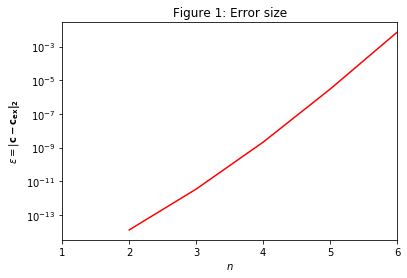

,n,$\epsilon$
0,1,0.000000e+00
1,2,1.292063e-14
2,3,3.455002e-12
3,4,2.122059e-09
4,5,2.992435e-06
5,6,7.192670e-03


In [50]:
# Change output style of a Pandas DataFrame
pd.set_option('display.notebook_repr_html', True)

def _repr_latex_(self):
    return  "\centering{%s}" % self.to_latex()

pd.DataFrame._repr_latex_ = _repr_latex_  # monkey patch pandas DataFrame
df = pd.DataFrame(list(zip(p_deg,errors)),columns = ['n',r"$\epsilon$"])

plt.figure(1)
plt.title("Figure 1: Error size")
plt.semilogy(p_deg,np.ma.masked_where(errors<=0,errors),'r')
plt.xlabel(r"$n$")
plt.ylabel(r"$\epsilon = \| \bfc - \bfc_{ex}\|_2$")
#plt.axis([0,6.5,1e-20,1e-6])
plt.xlim((p_deg[0],p_deg[-1]))
plt.show()

df

After the $QR$ factorization and computation of the proper rhs vector $\bfb_1$ you 
need to solve $\widehat{R} \bfx = \bfb_1$. To solve a system with a
triangular matrix you can either use your code from the previous lab or
the built-in function [solve_triangular](https://docs.scipy.org/doc/scipy-1.3.0/reference/generated/scipy.linalg.solve_triangular.html?highlight=solve_triangular#scipy.linalg.solve_triangular).

<font color='blue'>
    
   Your comments here: 

</font>

As is easily inferred either from the table or the plot, the error $\epsilon = \| \bfc - \bfc_{ex}\|_2$ increases exponentially with respect to the degree of the polynomial approximated. However, the constant with which it grows differs for $1\leq n \leq 4$ and $n\geq 5$, as one can se (not easily, admittedly) from "Figure 1: Error size". This is possibly related to Abel's theorem, which states that only equations of degree $n<5$ can be solved trivially.

__Comment on the figures:__ as the axises are logarithmically related, the point $(n,\epsilon)=(1,0)$ is not included, as this would essentially be in $y=-\infty$.

__b)__ Next, you are asked to implemented a QR factorization 

based the __modified Gram-Schmidt orthogonalization__:

### Algorithm

Let $\bfa_1, \ldots, \bfa_n \in \RR^{m}$ be linearly independent vectors.

```
for j = 1,2,...,n
    y = a_j
    for i = 1,2,...,j-1
        r_ij = q_i^T y
        y = y - r_ij q_i
    end
    r_jj = ||y||
    q_j = y/r_jj
end 
```

In [39]:
"""
def qr_factor(A):
    m,n = A.shape
    Q = np.copy(A).astype(float)
    R = np.zeros((n,n), dtype=float)

    for j in range(n):
        y = Q[:,j]
        for i in range(j):
            R[i,j] = Q[:,i] @ Q[:,j]
            y = y - R[i,j]*Q[:,i]
        R[j,j] = norm(y)
        Q[:,j] = y / R[j,j]
    return (Q,R)
"""
def qr_factor_modified(A):
    m,n = A.shape
    Q = np.copy(A).astype(float)
    R = np.zeros((n,n),dtype=float)
    
    for j in range(n):
        y = Q[:,j]
        for i in range(j):
            R[i,j] = Q[:,i] @ y
            y = y - R[i,j]*Q[:,i]
        R[j,j] = norm(y)
        Q[:,j] = y / R[j,j]
    return (Q,R)

Can you spot the difference to the standard Gram-Schmidt orthogonalization method?
Explain, why this modfied method still a orthogonalization procedure.

<font color='blue'> Your comments here: </font>

The modified factorisation specifies $r_{ij}$  using the vector $y$ instead of $a_i$. $y$, initially defined as $a_i$, is continuously muted whilst the second for-loop runs by subtracting the previous columns of $Q$. Less error is supposed to be carried to the next iteration of the algorithm, as the rows $q_i$ for $i<j$ are all orthogonal.


__c)__ The modified Gram-Schmidt process  is actually more stable with respect to rounding errors than the original/classical one. Test this claim and repeat the experiment from a) but now use the ```qr_factor_modified``` function based on the modified Gram-Schmidt method.
How does the solution $\bfc_n$ compares the one computed with the original Gram-Schmidt method?

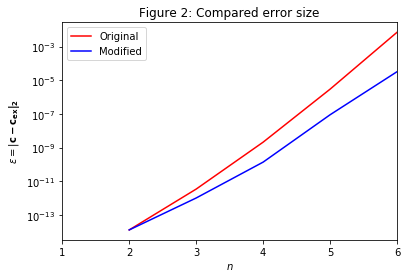

,n,$\epsilon_{original}$,$\epsilon_{modified}$
0,1,0.000000e+00,0.000000e+00
1,2,1.292063e-14,1.292063e-14
2,3,3.455002e-12,1.020074e-12
3,4,2.122059e-09,1.383662e-10
4,5,2.992435e-06,9.006273e-08
5,6,7.192670e-03,3.267371e-05


In [48]:
errors_mod = np.zeros(len(p_deg))
for n in p_deg: 
    c_ex = np.ones(n,dtype=float) #poly_coeff
    poly = np.poly1d(c_ex) #polynomial function
    y_data = poly(x_data)
    
    # Define matrix A
    A = np.array([mono(x_data,k) for k in range(n)], dtype=float)
    A = A.transpose()
    Q,R = qr_factor_modified(A)
    y1 = (Q.T @ y_data)[:n]
    c = la.solve_triangular(R,y1)
    errors_mod[n-1]=norm(c_ex-c)

pd.DataFrame._repr_latex_ = _repr_latex_  # monkey patch pandas DataFrame
df = pd.DataFrame(list(zip(p_deg,errors)),columns = ['n',r"$\epsilon$"])

plt.figure(2)
plt.title("Figure 2: Compared error size")
plt.semilogy(p_deg,np.ma.masked_where(errors<=0,errors),'r',label="Original")
plt.semilogy(p_deg,np.ma.masked_where(errors_mod<=0,errors_mod),'b',label="Modified")
plt.xlabel(r"$n$")
plt.ylabel(r"$\epsilon = \| \bfc - \bfc_{ex}\|_2$")
plt.xlim((p_deg[0],p_deg[-1]))
plt.legend()
plt.show()

pd.DataFrame._repr_latex_ = _repr_latex_  # monkey patch pandas DataFrame
df2 = pd.DataFrame(list(zip(p_deg,errors,errors_mod)),columns = ['n',r"$\epsilon_{original}$",r"$\epsilon_{modified}$"])
df2


<font color='blue'>   Your comments here: </font>

As anticipated, the error isn't propagated through the matrix to the same degree, thus making it consistently smaller than the original.